# Youtube Spam Comments Classifier

## Glossary
[ - Including Necessary Libraries](#libs)
<br>
[ - Importing the Dataset](#dataset)
<br>
[- Visualization](#v)
<br>
[ - Support vector machine (SVM)](#m1)
<br>
[ - Logistic Regression](#m2)
<br>
[ - Decision Tree](#m3)
<br>
[ - Comparison Plot Between The Three Models](#comp)

## Including Necessary Libraries <a id='libs'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

## Importing the Dataset <a id='dataset'></a>

Read the data from five different CSV files. Each CSV file corresponds to a specific YouTube artist (Psy, Katy Perry, LMFAO, Eminem, Shakira) and contains data related to their respective YouTube videos

In [2]:
Psy = pd.read_csv('./Datasets/Youtube01-Psy.csv')
Katy = pd.read_csv('./Datasets/Youtube02-KatyPerry.csv')
Lmfao = pd.read_csv('./Datasets/Youtube03-LMFAO.csv')
Eminem = pd.read_csv('./Datasets/Youtube04-Eminem.csv')
Shakira = pd.read_csv('./Datasets/Youtube05-Shakira.csv')
Psy.sample(10)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
213,z12iircxtsjpwvqbd04chjzbemjtj5kohxg0k,Bert Dionne,2014-11-07T18:05:40,The most liked video on YouTube...﻿,0
342,z12uyzhazxqkzbrzz04cedqpkwzdvjyy3u40k,Brandon Wilson,2014-11-14T12:21:52,Why does a song like this have more views than...,0
81,z12jud4o3n34v5wph04ce3db0y2njn55gog0k,Kaya Roberts,2014-11-02T20:00:37,Admit it you just came here to check the numbe...,0
304,z13xwborhli2vdrab04chblgxvjattz4ezs0k,Luna Gamer Potter,2014-11-09T02:42:40,I hate this song! ﻿,0
315,z12ig3jrnlfvsthaa04chjkrply5zligbdg,Aaa Aaa,2014-11-12T05:46:27,PLEASE SUBSCRIBE ME!!!!!!!!!!!!!!!!!!!!!!!!!!!...,1
266,z12mfnjahrvcgjh4004cdf3buuzshjsrzhw,Kincaid Liebenberg,2014-11-08T05:36:38,PSY is a good guy﻿,0
130,z12dzlpo0ueie1go404cfjjwsxf1g1lrtdo,Amir effect,2014-11-05T17:18:14,Can somebody wake me up when we get to 3 billi...,0
277,z12th3fqdqq5yn0tq23rzboi3wb4tft0y,Markus Mairhofer,2014-11-08T08:49:47,"Hey, join me on tsū, a publishing platform whe...",1
135,z12uw5z5roiqel3ds22iifbhbmnijn1qz04,Noah François,2014-11-05T20:15:09,"Ahhh, 2 years ago....﻿",0
283,z12qxl3xupmjsbzzg04cfzegyw3xfjjjpfc,StarBlade34 OverLord,2014-11-08T09:34:57,Lol this youtuber (officialpsy) is getting so ...,0


In [3]:
Psy["CHANNEL_NAME"] = "officialpsy"
Katy["CHANNEL_NAME"] = "Katy Perry"
Lmfao["CHANNEL_NAME"] = "LMFAO"
Shakira["CHANNEL_NAME"] = "Shakira"
Eminem["CHANNEL_NAME"] = "EminemMusic"

 concatenates multiple DataFrames, namely 'Psy', 'Katy', 'Lmfao', 'Eminem', and 'Shakira', into a single DataFrame called 'C_S'.<br>The resulting concatenated DataFrame, 'C_S', will contain all the rows and columns from the individual DataFrames stacked vertically.

In [4]:
C_S = pd.concat([Psy, Katy, Lmfao, Eminem, Shakira])
C_S.sample(10)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CHANNEL_NAME
411,z12acz2r2qiwxtpwy04cihii5rmwefpzeao,InfernoGaming,2015-05-19T23:19:47.316000,:D﻿,0,EminemMusic
221,_2viQ_Qnc694tFwvOhmFcrz4GGaxVyxStdYmFH-nR68,5000palo,2013-10-04T16:15:05.278000,I want new song,0,Shakira
218,z12xczhjizrzuhvlp22gh3apkrasg3ggt04,Ben Stalker,2014-11-07T19:27:45,GANGMAN STY- *D-D-D-D-D-D--DROP THE BASS!!*﻿,0,officialpsy
120,z13tuhvy3vmwxbprk04ci35w5luiwfi4lgk,strong heart,2015-05-21T08:00:58.240000,wow,0,Shakira
92,z13xwb3adyricdunf223txebnov1f1aiz04,Gram Bangla,2014-09-12T09:03:16,WOW VERY NICE CONGRASULATION I LIVE SO MUCH ht...,1,Katy Perry
97,z135jnejqyylxvxc323tifugxr3idl1oq04,Monwar Sarkar,2014-11-04T00:18:07,Please help me go here http://www.gofundme.com...,1,officialpsy
14,z13usjdoivinwzsoy04cgv2y0tbjs1s5xn00k,Karolína Hlavatá,2015-05-27T14:41:43.081000,wery good﻿,0,Shakira
128,z13xg5zjtp3sfxm4a04cf1bolmzvu154bto0k,Marsonal Carrey,2015-05-26T17:25:43.332000,"1,000,000 VIEWS NEAR﻿",0,EminemMusic
388,z13wz10yyn3wz3fu523zzzeackarhvpu4,bebishyne alicdan,2014-10-04T13:16:55.971000,Check out this video on YouTube:﻿,1,LMFAO
65,z13bejijvrbdy5mrg04cgv3bjvubyxoi050,GGSCommunity,2014-09-07T22:36:24,"Like Gorlin-Goltz Syndrome Support Community, ...",1,Katy Perry


In [5]:
C_S = C_S.rename(columns=
{'DATE': 'Date', 'CHANNEL_NAME': 'Channel Name', 
'AUTHOR': 'Comment Author', "CLASS": "Ham/Spam", 
"COMMENT_ID": 'Id', "CONTENT": 'Content'})
C_S.sample(10)

,Id,Comment Author,Date,Content,Ham/Spam,Channel Name
304,z13xwborhli2vdrab04chblgxvjattz4ezs0k,Luna Gamer Potter,2014-11-09T02:42:40,I hate this song! ﻿,0,officialpsy
133,z130ilq4jomxx1poy04cjvniyzbqjzrjpqc0k,Play Now,2015-05-20T10:06:29.780000,like me﻿,0,Shakira
344,_2viQ_Qnc68ki9xsFeN2y1_ZiHYcZC8Qv1GyHfwqr7Y,steven reed,2013-07-19T22:12:16.609000,Please check out and send to others Freedom an...,1,Shakira
207,z13wxrnxjxz3wj3tn22sv33o0xyev5jfa,Durgesh Rathod,2015-05-24T09:57:50.220000,fav.﻿,0,EminemMusic
136,z130g5myrnncvnns3225s5jqjkqwi5de2,Samuel Hsu,2015-05-20T02:24:46.417000,I love this song and expect the World Cup .﻿,0,Shakira
237,_2viQ_Qnc6-M29TD0eSrvhfMU9n1v7kunCbSMqnODXg,Abdullah Alawani,2013-10-02T12:49:44.963000,I love you,0,Shakira
87,z13lvdcijuj5znbge04cc1iawv3eezsbbjo,Рустем Ахметов,2015-05-23T10:13:32.711000,GREAT!!!﻿,0,Shakira
409,z122djvavnibdrr1j23pjbm4szvfuzlzd04,RandomFuntime,2014-08-04T13:27:47.451000,Hey I&#39;m a British youtuber!!<br />I upload...,1,LMFAO
300,_2viQ_Qnc6_m4670hGGDwGjYreYnRR8359YYmuS_lDA,Adam Whitney,2013-08-26T05:24:14.644000,Hello everyone :) I know most of you probably ...,1,Shakira
40,z13lhdo5vnyndj3p304cjjs4zze3sldrqbg,Mai Nguyễn,2014-08-28T03:53:35,"help me click on the subscribe Mai Nguyen, tha...",1,Katy Perry


In [6]:
C_S=C_S[["Date", "Channel Name", "Comment Author", "Content", "Ham/Spam", "Id"]]
C_S.sample(10)

,Date,Channel Name,Comment Author,Content,Ham/Spam,Id
92,2015-05-23T11:46:55.624000,LMFAO,Terry Short,Support the fight for your 4th amendment right...,1,z13tsligxuffvrxkz23qibyydnbagphm2
346,2015-06-05T19:02:05,Katy Perry,Kasia Fabisiewicz,&lt;3﻿,0,z132enrpoy35yxpoe04cjr4zur3jvbyq3xo0k
264,NaN,EminemMusic,Ashim Limbu,YO GUYS IM 14 YEAR OLD RAPPER JUST STARTED RAP...,1,LneaDw26bFtUEhNudjpH0X1gcH2nF0v4w6dhXurctSU
189,2015-05-16T20:51:51.477000,LMFAO,はれたらいいね,"So,cool！！﻿",0,z125ynbaple1d13c322isreomnqfwlbpm04
153,2014-09-22T23:23:33,Katy Perry,Vincent Lenzi,Free itunes $25 giftcard codes: http://shhort....,1,z12sfnzallq5t5iki23gfbjb0ynxgxjyc04
28,2015-05-27T03:47:34.735000,LMFAO,Jared Acevedo,Super awesome video<br />﻿,0,z12rif2ypuzofjo0s22se3e5dzrnznq2z
326,2014-11-12T20:12:47,officialpsy,Arthur Teixeira,I wanted to know the name of the guy that danc...,0,z12usr54ppaxxf1dl23nhbybruapdnixw04
285,2013-09-05T18:08:08.377000,Shakira,fatiha el fallali,Shakira,0,_2viQ_Qnc6_VU7QGeFKeturpUPwo-jDiYu85rbtMPS8
391,2014-10-02T15:00:43.724000,LMFAO,xiaoying chen,Check out this video on YouTube:﻿,1,z12bdp1b5wekjb1ci22itf3alnfvzfibo04
144,2015-05-19T22:01:54.036000,LMFAO,Fire Ghost73,cooooooooooooolllllllllll﻿,0,z13jzdtr3nqkc5ooj04cilhxgzywzhfrnzc0k


In [7]:
C_S.describe()

,Ham/Spam
count,1956.000000
mean,0.513804
std,0.499937
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
C_S.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1711 non-null   object
 1   Channel Name    1956 non-null   object
 2   Comment Author  1956 non-null   object
 3   Content         1956 non-null   object
 4   Ham/Spam        1956 non-null   int64 
 5   Id              1956 non-null   object
dtypes: int64(1), object(5)
memory usage: 107.0+ KB


In [9]:
C_S.shape

(1956, 6)

In [10]:
C_S.dropna().shape

(1711, 6)

In [11]:
C_S[C_S['Date'].isnull()]

,Date,Channel Name,Comment Author,Content,Ham/Spam,Id
0,NaN,EminemMusic,Lisa Wellas,+447935454150 lovely girl talk to me xxx﻿,1,z12rwfnyyrbsefonb232i5ehdxzkjzjs2
2,NaN,EminemMusic,Ajkal Khan,"my sister just received over 6,500 new <a rel=...",1,z13vsfqirtavjvu0t22ezrgzyorwxhpf3
4,NaN,EminemMusic,Jihad Naser,Hello I&#39;am from Palastine﻿,1,z13xjfr42z3uxdz2223gx5rrzs3dt5hna
6,NaN,EminemMusic,kyeman13,Go check out my rapping video called Four Whee...,1,z12zgrw5furdsn0sc233hfwavnznyhicq
8,NaN,EminemMusic,Muhammad Asim Mansha,Aslamu Lykum... From Pakistan﻿,1,z12gxdortqzwhhqas04cfjrwituzghb5tvk0k
...,...,...,...,...,...,...
440,NaN,EminemMusic,Ando Nesia - | MC | Music Producer,DO YOU KNOW HOW SEAN KINGSTON GOT FAMOUS WHY D...,1,LneaDw26bFv4NFg1m91sL1Aq1p-2N06VweQT4vOwTqc
442,NaN,EminemMusic,the34104,check out eminem latest track survival if u didnt,1,LneaDw26bFsVQRSG0ecctIfRIn4Od1tJqvnhDwCNqbI
443,NaN,EminemMusic,Dany PK,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4
444,NaN,EminemMusic,SmexyFriedChicken,Check out my videos guy! :) Hope you guys had ...,1,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8


In [12]:
C_S.duplicated().sum()

3

In [13]:
C_S.Id.value_counts()

_2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0    2
LneaDw26bFuH6iFsSrjlJLJIX3qD4R8-emuZ-aGUj0o    2
LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s    2
LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU    1
LneaDw26bFsTytWDcS_4DFWlbxAlCfw2c_9PIcArNdw    1
                                              ..
z13qh3azhtvkvbypn04cflwaxoz5x51bip00k          1
z122g12wzuztdjac4232jxuomqylcfjhc04            1
z122ghagzyvyzrv3b23fzf4pelvusdoub              1
z13hhrvguty1drrkk23ie1ywjn31zj0sl              1
_2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA    1
Name: Id, Length: 1953, dtype: int64

In [14]:
C_S.drop_duplicates(inplace=True)

In [15]:
C_S.duplicated().sum()

0

In [16]:
C_S.drop(columns='Date',inplace=True)

In [17]:
C_S.sample(5)

,Channel Name,Comment Author,Content,Ham/Spam,Id
391,EminemMusic,Honesty Wright,hay my is honesty wright i am 12year old i lo...,0,z13mxl3zavzfc55as04ccf4ifo2textrofs
284,officialpsy,Super Cot,1 million dislikes!EPIC FAIL(ready for you fan...,0,z12gdhri2nzouxcxq04ci11h5we3edegkbg
123,EminemMusic,Andrew Guasch,"Listen...Check out Andrew Guasch - Crazy, Sick...",1,LneaDw26bFs87f8zCtdgtSzADarWSHU_uPcclXWKxms
95,Shakira,Dunrell Pinder,i love her﻿,0,z13aznjg2ojwjlknm23yjbt4uniuepuxs04
244,EminemMusic,deazy99,I know that maybe no one will read this but PL...,1,LneaDw26bFu1Ru9jx_4ZrghWiGAVmVtFPtTTpL7ihGI


In [18]:
C_S['Comment Author'].value_counts()

M.E.S              8
5000palo           7
Louis Bryant       7
Shadrach Grentz    7
DanteBTV           6
                  ..
Nick McGoldrick    1
Shaun Mac          1
Denzel Saimi       1
GX2re              1
Latin Bosch        1
Name: Comment Author, Length: 1792, dtype: int64

In [19]:
C_S.drop(columns="Id", inplace=True)

In [20]:
C_S.sample(20)

,Channel Name,Comment Author,Content,Ham/Spam
332,EminemMusic,Seth Ryan,Almost a billion﻿,0
225,officialpsy,none dies virgin life fucks us all,You think you're smart? Headbutt your f...,0
340,officialpsy,Anthony1SV,Please do buy these new Christmas shirts! You ...,1
203,Shakira,Anderson St. Martin,Hello everyone my name&#39;s Anderson and i&#3...,1
68,LMFAO,nienke de kimpe,Cool﻿,0
84,LMFAO,Sana Kashif,Nice﻿,0
216,EminemMusic,lisabelb,CHECK OUT MY COVER OF LOVE THE WAY YOU LIE PLE...,1
175,Shakira,rijia babu,"Hey, have you tried &quot;DribblePROshot&quot;...",1
113,Katy Perry,Alanoud Alsaleh,I started hating Katy Perry after finding out ...,0
131,Shakira,Basanagowda Policepatil,Very nice,0


## Visualization<a id = "v">

# Univariate


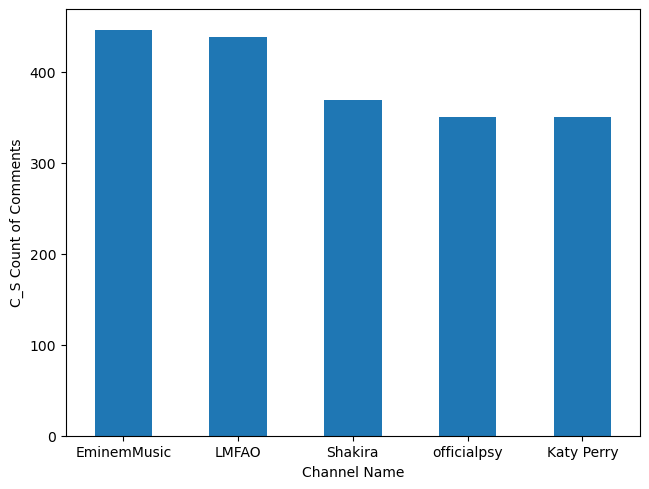

In [21]:
C_S['Channel Name'].value_counts().plot(kind='bar', rot=0)
plt.tight_layout()
plt.xlabel('Channel Name')
plt.ylabel('C_S Count of Comments')
plt.show()

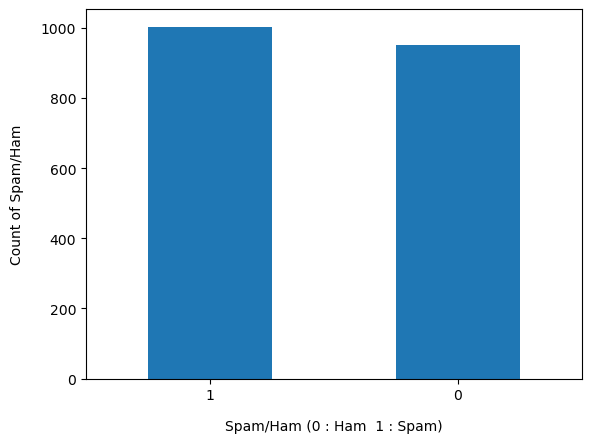

In [22]:
C_S['Ham/Spam'].value_counts().plot(kind='bar',rot=0)
plt.xlabel("Spam/Ham (0 : Ham  1 : Spam)",labelpad=12)
plt.ylabel('Count of Spam/Ham',labelpad=12)
plt.show()

# Bivariate

Text(0.5, 0, 'Channel Name')

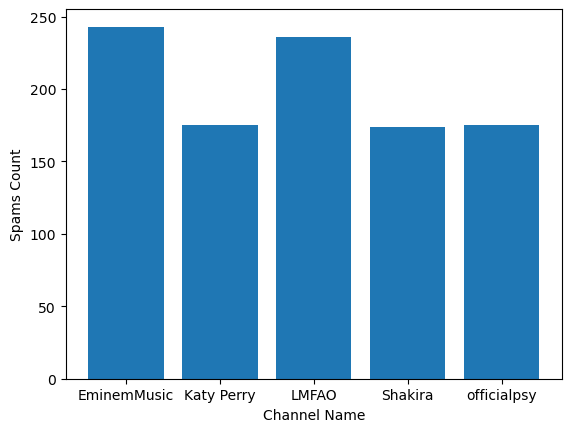

In [23]:
mask1=C_S.groupby('Channel Name')['Ham/Spam'].sum()
plt.bar(height=mask1.values,x=mask1.index)
plt.ylabel('Spams Count')
plt.xlabel('Channel Name')

In [24]:
mask2 = C_S.groupby('Channel Name')['Ham/Spam'].count()-mask1

Text(0.5, 0, 'Channel Name')

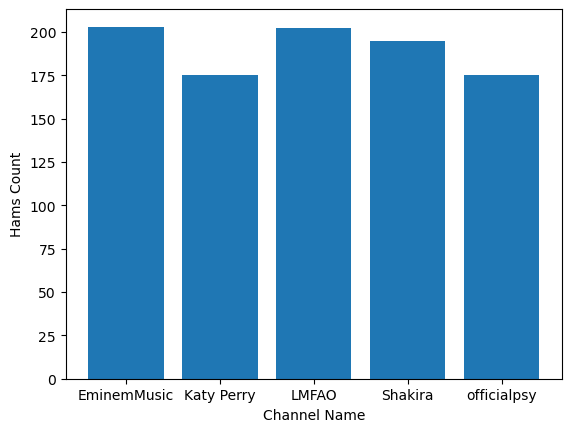

In [25]:
plt.bar(height=mask2.values,x=mask2.index)
plt.ylabel('Hams Count')
plt.xlabel('Channel Name')

In [26]:
C_S

,Channel Name,Comment Author,Content,Ham/Spam
0,officialpsy,Julius NM,"Huh, anyway check out this you[tube] channel: ...",1
1,officialpsy,adam riyati,Hey guys check out my new channel and our firs...,1
2,officialpsy,Evgeny Murashkin,just for test I have to say murdev.com,1
3,officialpsy,ElNino Melendez,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,officialpsy,GsMega,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...
365,Shakira,Katie Mettam,I love this song because we sing it at Camp al...,0
366,Shakira,Sabina Pearson-Smith,I love this song for two reasons: 1.it is abou...,0
367,Shakira,jeffrey jules,wow,0
368,Shakira,Aishlin Maciel,Shakira u are so wiredo,0


In [27]:
C_S['Comment Author'].value_counts()[:10]

M.E.S              8
5000palo           7
Louis Bryant       7
Shadrach Grentz    7
DanteBTV           6
Derek Moya         5
Hidden Love        5
LuckyMusiqLive     5
Scott Johnson      4
James Cook         4
Name: Comment Author, dtype: int64

In [28]:
C_S[C_S['Comment Author']=='M.E.S']

,Channel Name,Comment Author,Content,Ham/Spam
320,EminemMusic,M.E.S,hey its M.E.S here I&#39;m a young up and comi...,1
327,EminemMusic,M.E.S,im M.E.S an aspiring young rapper with high ho...,1
358,EminemMusic,M.E.S,hey its M.E.S here I&#39;m a young up and comi...,1
380,EminemMusic,M.E.S,hey its M.E.S here I&#39;m a young up and comi...,1
388,EminemMusic,M.E.S,hey its M.E.S here I&#39;m a young up and comi...,1
404,EminemMusic,M.E.S,hey guys i know its annoying getting spammed s...,1
407,EminemMusic,M.E.S,hey guys i know you wanna skip over this but p...,1
439,EminemMusic,M.E.S,hey guys look im aware im spamming and it piss...,1


In [29]:
# C_S.__delitem__("Id")
# C_S.sample(10)

In [30]:
# C_S['Date'] = pd.to_datetime(C_S['Date'])
# C_S['Date'] = (C_S['Date'] - pd.Timestamp('2005-02-14')) / pd.Timedelta(seconds=10**9)
# C_S['Date'] = C_S['Date'].values*10**9
# C_S.sample(10)

In [31]:
C_S.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 369
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Channel Name    1953 non-null   object
 1   Comment Author  1953 non-null   object
 2   Content         1953 non-null   object
 3   Ham/Spam        1953 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 76.3+ KB


In [32]:
x = C_S['Content']
y = C_S['Ham/Spam']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
vc = TfidfVectorizer()
x_train_vectors = vc.fit_transform(x_train)
x_test_vectors = vc.transform(x_test)
x_test_vectors

<391x3823 sparse matrix of type '<class 'numpy.float64'>'
	with 4597 stored elements in Compressed Sparse Row format>

## support vector machine (SVM) Using Grid Search Cross Validation <a id='m1'></a>

The SVM model is created and trained k times, each time using a different fold as the test set and the remaining folds as the training set.

In [33]:
svm_model = SVC()

In [34]:
k = 5 
scores = cross_val_score(svm_model, x_train_vectors, y_train, cv=k)

In [35]:
print("Accuracy scores for each fold:", scores)

Accuracy scores for each fold: [0.93610224 0.96166134 0.93910256 0.94230769 0.94551282]


In [36]:
average_accuracy = scores.mean()
average_accuracy_formatted = "{:.3f}%".format(average_accuracy * 100)
print("Average accuracy:", average_accuracy_formatted)

Average accuracy: 94.494%


specifies the hyperparameters and their corresponding values to be tuned during the grid search. The 'C' hyperparameter can take values of 0.1, 1, and 10, the 'gamma' hyperparameter can take values of 0.1, 0.01, and 0.001, and the 'kernel' hyperparameter can take values of 'linear' or 'rbf'.

In [37]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
    }
svm_model = svm.SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train_vectors, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']})

Retrieves the best estimator found during the grid search process.<br>The best estimator, svm_best_fit, is used to fit the SVM model to the training data.<br>Trained SVM model, svm_best_fit, to predict the target labels for the test data.

In [38]:
svm_best_fit = grid_search.best_estimator_
svm_best_fit.fit(x_train_vectors,y_train)
y_pred=svm_best_fit.predict(x_test_vectors)


## Evaluation

Display a summary of various evaluation metrics for each class in the classification problem and the accuracy of the model: <br>-  Precision<br>- Recall<br>- F1-score<br>- Support

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       180
           1       0.94      0.95      0.95       211

    accuracy                           0.94       391
   macro avg       0.94      0.94      0.94       391
weighted avg       0.94      0.94      0.94       391



In [40]:
from sklearn.metrics import accuracy_score

In [41]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [42]:
cm = confusion_matrix(y_test, y_pred)

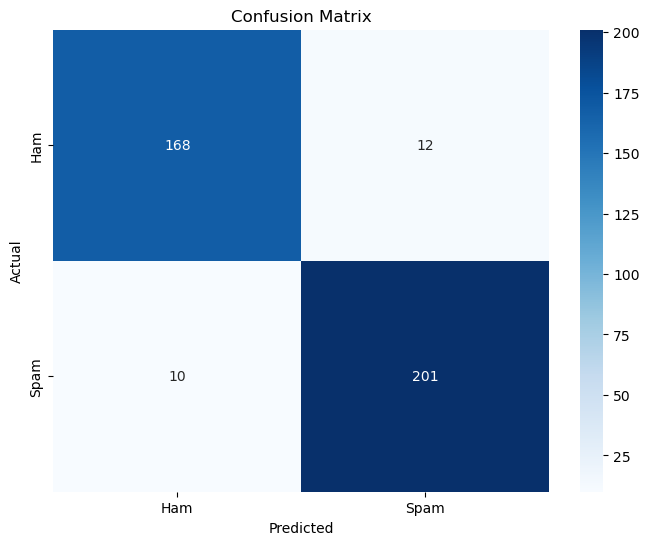

In [43]:
labels = ['Ham', 'Spam']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression<a id='m2'></a>

 model the relationship between the input features and the probability of the positive class. It takes any real-valued number as input and maps it to a value between 0 and 1, representing the estimated probability.

In [44]:
logistic_regression = LogisticRegression()

In [45]:
k = 5 
scores = cross_val_score(logistic_regression, x_train_vectors, y_train, cv=k)

In [46]:
print("Accuracy scores for each fold:", scores)

Accuracy scores for each fold: [0.92332268 0.95207668 0.93269231 0.93589744 0.93910256]


In [47]:
average_accuracy = scores.mean()
average_accuracy_formatted = "{:.3f}%".format(average_accuracy * 100)
print("Average accuracy:", average_accuracy_formatted)

Average accuracy: 93.662%


the grid search process, It apply all possible combinations of the hyperparameter values will be evaluated. This helps identify the best combination of hyperparameters

In [48]:
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

In [49]:
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)

In [50]:
grid_search.fit(x_train_vectors, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']})

In [51]:
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'solver': 'liblinear'}


In [52]:
logistic_regression.fit(x_train_vectors, y_train)

LogisticRegression()

In [53]:
y_pred = logistic_regression.predict(x_test_vectors)

In [54]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       180
           1       0.94      0.95      0.95       211

    accuracy                           0.94       391
   macro avg       0.94      0.94      0.94       391
weighted avg       0.94      0.94      0.94       391



In [55]:
cm = confusion_matrix(y_test, y_pred)

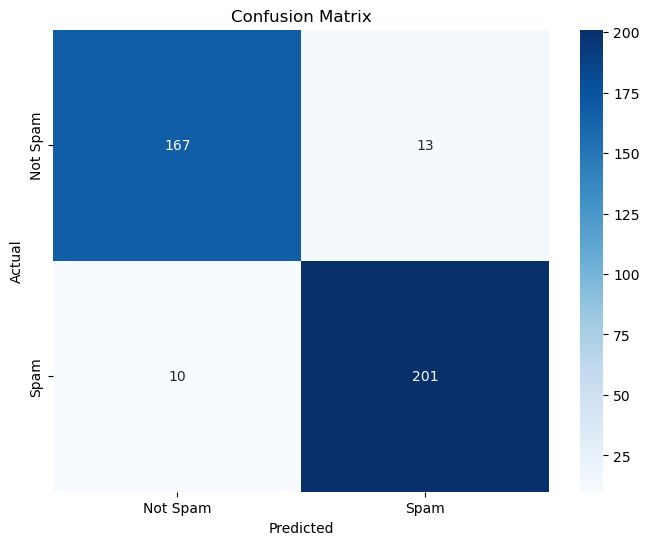

In [56]:
labels = ['Not Spam', 'Spam']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision tree<a id='m3'></a>

Algorithm that starts by examining the entire dataset, which consists of input features and corresponding target labels. At the root node of the tree, the algorithm evaluates a feature that best splits the data into different subsets based on certain criteria (Gini impurity or entropy).

In [57]:
comments = C_S['Content']
labels = C_S['Ham/Spam']

The data will be divided into 5 equal-sized subsets, and the model will be trained and evaluated 5 times.
\

In [58]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comments)

In [59]:
classifier = DecisionTreeClassifier()

In [60]:
scores = cross_val_score(classifier, X, labels, cv=5)
mean_accuracy = scores.mean()

In [61]:
print("Mean Accuracy: {:.3f}%".format(mean_accuracy * 100))

Mean Accuracy: 91.348%


Represents the maximum depth or levels allowed for the decision tree. The decision tree will stop growing and start pruning when it reaches this maximum depth.

In [62]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [63]:
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(x_train_vectors, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [64]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [65]:
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [66]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_vectors)

In [67]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       180
           1       0.96      0.95      0.95       211

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391



In [68]:
cm = confusion_matrix(y_test, y_pred)

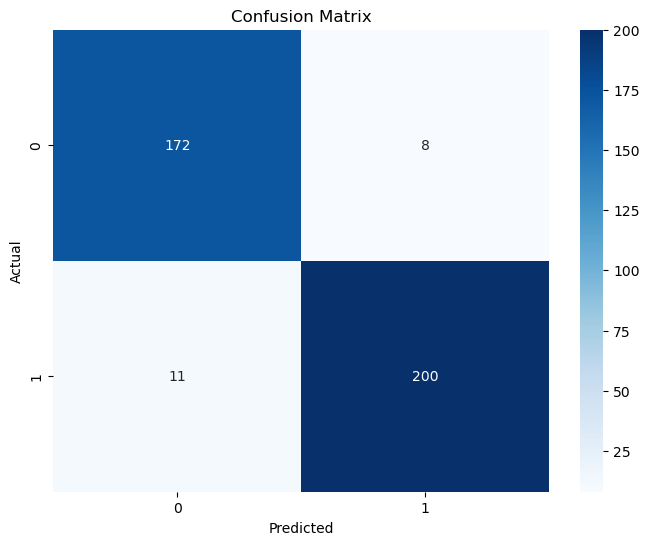

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparison Plot Between The Three Models<a id='comp'>

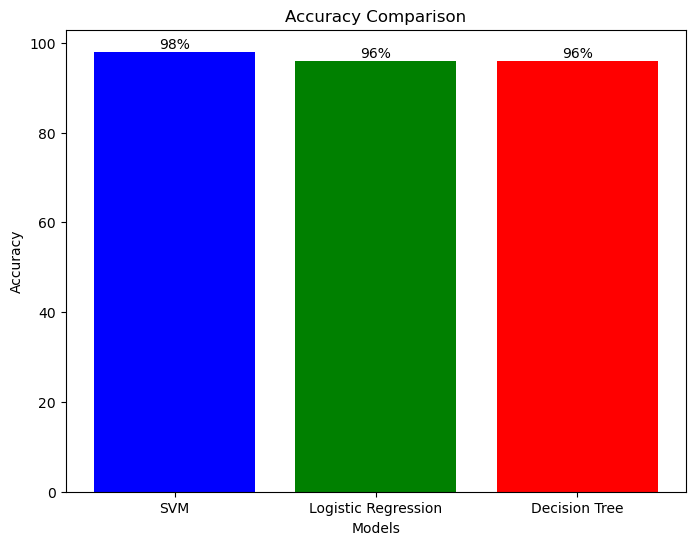

In [70]:
accuracy_scores = np.array([98, 96, 96])

models = np.array(['SVM', 'Logistic Regression', 'Decision Tree'])

colors = ['blue', 'green', 'red']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=colors)

for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score}%', ha='center', va='bottom')

plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()

1. Support Vector Machine(SVM) Model: The model achieved an accuracy of 94%-98%. It demonstrates strong predictive power and performs well.<br>
2. Logistic Regression Model: The model achieved an accuracy of 93%-96%. It showcases good performance in classifying.<br>
3. Decision Tree Model: The model achieved an accuracy of 93%-96%. It showcases similar performance to the logistic regression model.

Overall, all three models performed well with high accuracies, indicating their effectiveness in classifying YouTube comments. The SVM model achieved identical accuracies, while the logistic regression and decision tree models achieved a slightly lower accuracy but still demonstrated respectable performance. Depending on the specific requirements and considerations of the task,